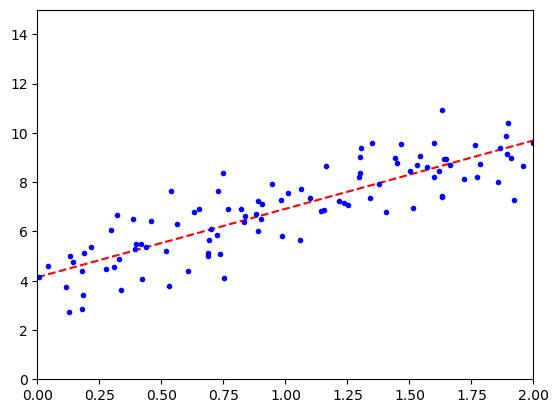

In [9]:
import numpy as np
import matplotlib.pyplot as plt
X=2*np.random.rand(100, 1)
y=4+3*X+np.random.randn(100, 1)
X_b=np.c_[np.ones((100,1)), X]
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)  #inv()对矩阵求逆，dot()计算矩阵内积
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
plt.plot(X_new, y_predict, "r--")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

标准方程：$\hat{\theta} = (X^{T}X)^{-1}X^{T}y  \ \ \ \ $     其中，$\hat{\theta}$是使成本函数最小的$\theta$值， $y$是包含$y^{(1)}$到$y^{(m)}$的目标值向量


In [13]:
#使用Scikit-Learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.predict(X_new)
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
np.linalg.pinv(X_b).dot(y) #pinv()计算伪逆

array([[4.1419922 ],
       [2.77501379]])

计算$\hat{\theta} = X^{+}y \ \ \ \ $, 其中$X^{+}$是$X$的伪逆，(Moore-Penrose逆)。

伪逆是使用奇异值分解计算的，可以将训练集矩阵$X$分解为三个矩阵$U, \Sigma, V^{T}$的乘积。它的计算公式为$X^{+} = V\Sigma^{+}U^{T}$。

为了计算矩阵$\Sigma^{+}$，该算法取$\Sigma$并将所有小于一个小阈值的值设置为零，然后将所有非零值替换成他们的倒数，最后把结果矩阵转置。